In [1]:
# Importer les packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Ouvrir la base de donnees

In [3]:
data = pd.read_csv('train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df =  data.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
var_cat = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
var_num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

print('Les variables categoriques sont : ',var_cat)

print('Les variables numeriques sont : ', var_num)

Les variables categoriques sont :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
Les variables numeriques sont :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [17]:
# Supprimer les valeur manquantes cote var_cat
df.Gender.fillna(df.Gender.mode()[0], inplace=True)
df.Married.fillna(df.Married.mode()[0], inplace=True)
df.Dependents.fillna(df.Dependents.mode()[0], inplace=True)
df.Self_Employed.fillna(df.Self_Employed.mode()[0], inplace=True)
df.Credit_History.fillna(df.Credit_History.mode()[0], inplace=True)

In [15]:
# Supprimer les valeur manquantes cote var_num
df.LoanAmount.fillna(df.LoanAmount.median(), inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(), inplace=True)


In [18]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Analyse univariee

In [20]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
df.Loan_Status.value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Credit oui ou non'}>

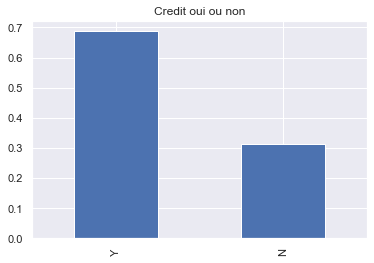

In [22]:
df.Loan_Status.value_counts(normalize=True).plot.bar(title = 'Credit oui ou non')

Les variables categoriques

In [23]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [24]:
df.Gender.value_counts(normalize=True)*100

Male      81.758958
Female    18.241042
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Comparaison des sexes'}>

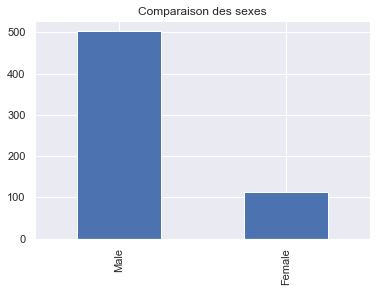

In [26]:
df.Gender.value_counts().plot.bar(title='Comparaison des sexes')

In [38]:
df.Dependents.value_counts(normalize=True)*100

0     58.631922
1     16.612378
2     16.449511
3+     8.306189
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':"Nombres d'enfant"}>

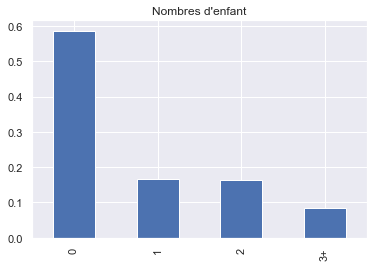

In [40]:
df.Dependents.value_counts(normalize=True).plot.bar(title='Nombres d\'enfant')

Yes    65.309446
No     34.690554
Name: Married, dtype: float64


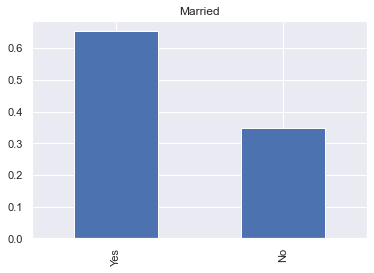

In [48]:
def count(var):
    som = df[var].value_counts(normalize=True)*100
    print(som)
    df[var].value_counts(normalize=True).plot.bar(title= var)
count('Married')

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64


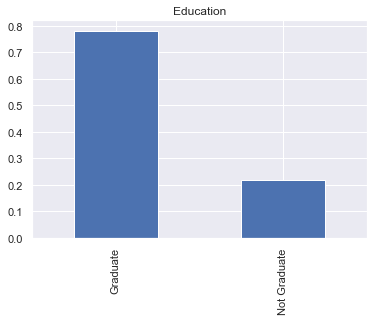

In [49]:
count('Education')

Les variables numeriques

In [50]:
df[var_num].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [51]:
# Function plot
def plot(var):
    plt.figure(1)
    
    plt.subplot(121)
    sns.distplot(df[var])
    
    plt.subplot(122)
    df[var].plot.box(figsize=(16,5))
    
    plt.suptitle(var)
    plt.show()

C:\Users\lilad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


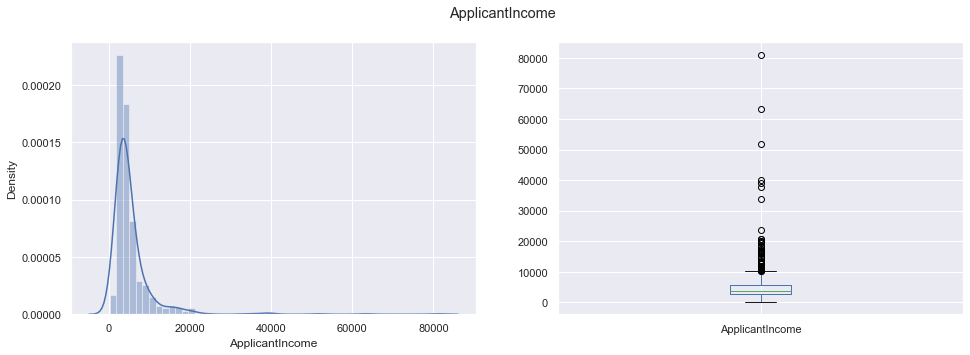

In [52]:
plot('ApplicantIncome')

C:\Users\lilad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


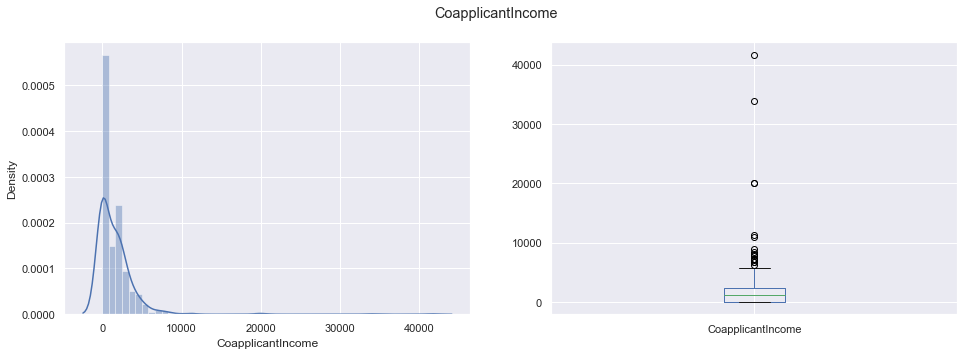

In [53]:
plot('CoapplicantIncome')

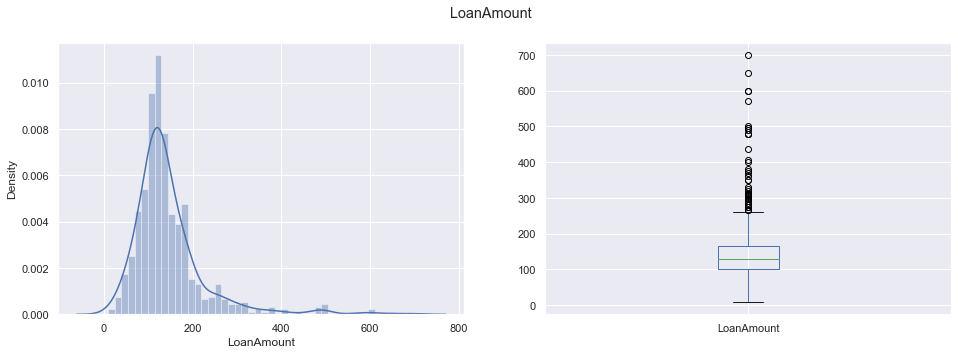

In [58]:
plot('LoanAmount')

C:\Users\lilad\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


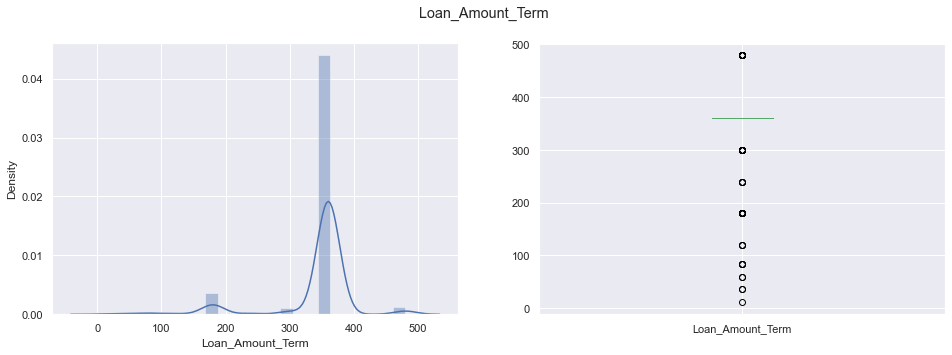

In [59]:
plot('Loan_Amount_Term')

## Analyse bivariee

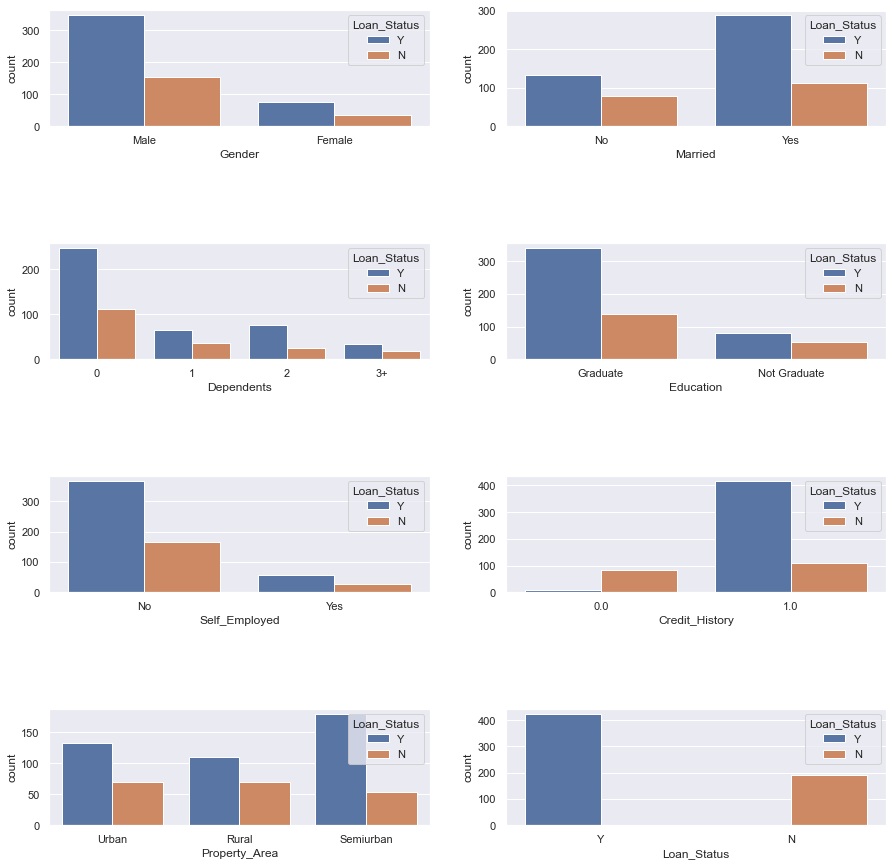

In [71]:
# les variables categoriques
fig, axes = plt.subplots(4,2,figsize=(15,15))
for idx,cat_col in enumerate(var_cat):
    row,col = idx // 2, idx%2
    sns.countplot(x=cat_col,data = df, hue = "Loan_Status", ax = axes[row,col] )
plt.subplots_adjust(hspace=1)

<AxesSubplot:>

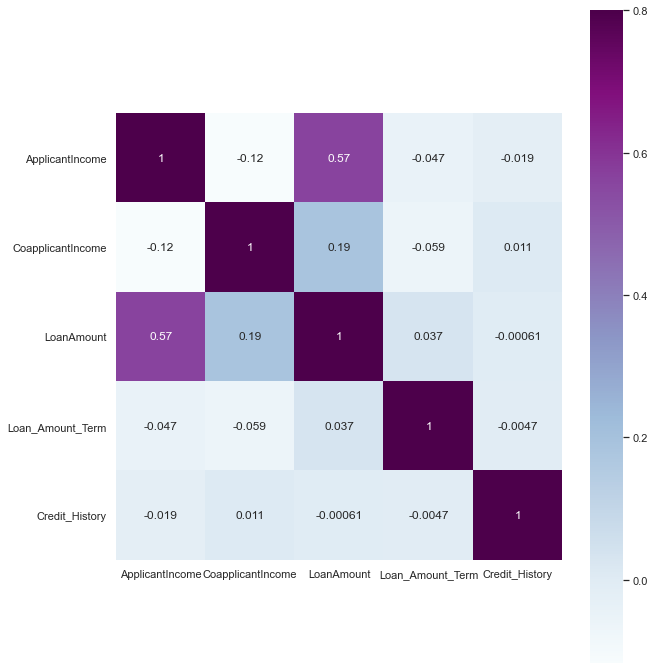

In [77]:
# Correlation des variables numerique
matrix = df.corr()
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(matrix, vmax = .8, square=True, annot =True, cmap = 'BuPu' )

## Creation de notre modele

In [80]:
df_cat = df[var_cat]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [81]:
df_cat = pd.get_dummies(df_cat, drop_first=True)
df_cat

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1.0,1,0,0,0,0,0,0,0,1,1
1,1.0,1,1,1,0,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1,1
3,1.0,1,1,0,0,0,1,0,0,1,1
4,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1
610,1.0,1,1,0,0,1,0,0,0,0,1
611,1.0,1,1,1,0,0,0,0,0,1,1
612,1.0,1,1,0,1,0,0,0,0,1,1


In [82]:
df_num = df[var_num]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [84]:
df_encoder = pd.concat([df_cat, df_num], axis=1)
df_encoder

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0


In [86]:
y = df_encoder.Loan_Status_Y
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [88]:
X = df_encoder.drop('Loan_Status_Y', axis=1)
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0
1,1.0,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0
2,1.0,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0
3,1.0,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1.0,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0
610,1.0,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0
611,1.0,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0
612,1.0,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0


## Machine learning

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [90]:
# Separer notre BD en train et test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=6)


In [91]:
# Instancier notre modele
clf = LogisticRegression()
clf.fit(X_train,y_train)


LogisticRegression()

In [92]:
pred = clf.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [94]:
accuracy_score(y_test, pred)

0.8373983739837398

In [95]:
profil_test = [[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
clf.predict(profil_test)

array([1], dtype=uint8)

In [96]:
import pickle

In [97]:
# Enregistrer le modele
pickle.dump(clf, open('prevision_credit.pkl','wb'))